# The 'bees.ilp' already has been trained

In [1]:
import h5py
import matplotlib.pyplot as plt
import cv2

In [37]:
#this cell runs the ilastik headless

ILASTIK_PATH = '/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/run_ilastik.sh'
MODEL='2_labels_2_features.ilp'
IMG = 'img3.jpg'
!$ILASTIK_PATH  --headless --project=$MODEL $IMG


INFO ilastik.app: Using tiktorch executable: ['/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".
Starting ilastik from "/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".
WARNING 2024-04-06 16:35:12,802 opConservationTracking 64880 4534793728 Could not find any ILP solver
WARNING 2024-04-06 16:35:12,833 opStructuredTracking 64880 4534793728 Could not find any ILP solver
WARNING 2024-04-06 16:35:12,835 structuredTrackingWorkflow 64880 4534793728 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!
INFO ilastik.shell.projectManager: Opening Project: 2_labels_2_features.ilp
INFO ilastik.workflows.pixelClassification.pixelClas

In [34]:
filename = "img3_Probabilities.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][:,:,0]  # returns as a numpy array

Keys: <KeysViewHDF5 ['exported_data']>
<class 'h5py._hl.dataset.Dataset'>


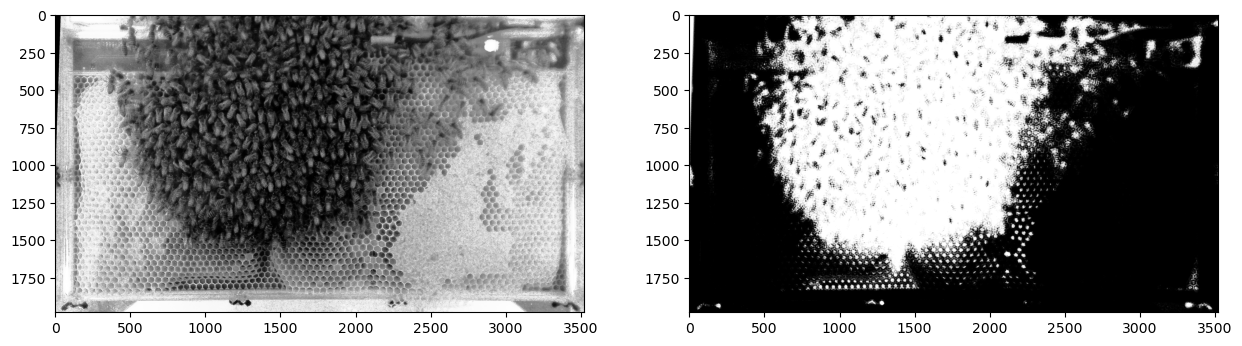

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(cv2.imread('img3.jpg'), cmap='gray')
ax[1].imshow(ds_arr, cmap='gray')
plt.show()

# 'bees.ilp' has been trained on 3 labels, global pipeline takes ~2min30s ->  will try to train a model on only 2 labels : Bees or not bees

# '2_features_all_features.ilp' only trained on 2 labels, global pipeline takes ~1min22s -> will try with less features for faster results

# '2_labels_less_features.ilp' has 2 less features, but takes only 5s less

# '2_labels_2_features is even slower (??)